## Imports

In [7]:
# Imports
# -----------
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import arus
from arus.testing import load_test_data


## Load test actigraph sensor files

In [8]:
# Load test Actigraph sensor files
# ---------------------------------
sensor_file, sr = load_test_data(file_type='actigraph',
                                 file_num='single',
                                 exception_type='consistent_sr')


## Setup stream

In [9]:
# Setup stream
# --------------
window_size = 12.8
gr = arus.plugins.actigraph.ActigraphSensorFileGenerator(sensor_file)
seg = arus.segmentor.SlidingWindowSegmentor(window_size)
stream = arus.Stream(gr, seg, name='spades-2')


## Start stream and read in data

In [10]:
# Start stream and read in data
# ------------------------------
stream.start()
chunk_sizes = []
for data, _, _, _, _, name in stream.generate():
    print("{},{},{},{}".format(name,
                               data.iloc[0, 0], data.iloc[-1, 0], data.shape[0]))
    chunk_sizes.append(data.shape[0])


6:28:19.988000,1024
spades-2,2015-12-04 16:28:20,2015-12-04 16:28:32.788000,1024
spades-2,2015-12-04 16:28:32.800000,2015-12-04 16:28:45.588000,1024
spades-2,2015-12-04 16:28:45.600000,2015-12-04 16:28:58.388000,1024
spades-2,2015-12-04 16:28:58.400000,2015-12-04 16:29:11.188000,1024
spades-2,2015-12-04 16:29:11.200000,2015-12-04 16:29:23.988000,1024
spades-2,2015-12-04 16:29:24,2015-12-04 16:29:36.788000,1024
spades-2,2015-12-04 16:29:36.800000,2015-12-04 16:29:49.588000,1024
spades-2,2015-12-04 16:29:49.600000,2015-12-04 16:30:02.388000,1024
spades-2,2015-12-04 16:30:02.400000,2015-12-04 16:30:15.188000,1024
spades-2,2015-12-04 16:30:15.200000,2015-12-04 16:30:27.988000,1024
spades-2,2015-12-04 16:30:28,2015-12-04 16:30:40.788000,1024
spades-2,2015-12-04 16:30:40.800000,2015-12-04 16:30:53.588000,1024
spades-2,2015-12-04 16:30:53.600000,2015-12-04 16:31:06.388000,1024
spades-2,2015-12-04 16:31:06.400000,2015-12-04 16:31:19.188000,1024
spades-2,2015-12-04 16:31:19.200000,2015-12-04 16

## Stop stream

In [11]:
# Stop stream
# --------------
stream.stop()


## Plot stats of recieved data

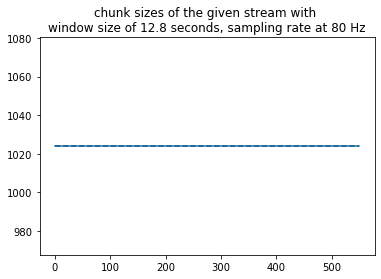

In [12]:
# Plot stats of recieved data
# ----------------------------
pd.Series(chunk_sizes).plot(
    title='chunk sizes of the given stream with \nwindow size of ' + str(window_size) + ' seconds, sampling rate at ' + str(sr) + ' Hz')
fig = plt.hlines(y=sr * window_size,
                 xmin=0,
                 xmax=len(chunk_sizes),
                 linestyles='dashed')
